In [53]:
from keras.datasets import reuters

In [54]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [75]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

In [76]:
import numpy as np

def to_one_hot(labels, dimension):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

x_train = vectorize_sequences(train_data, 10000)
x_test = vectorize_sequences(test_data, 10000)
y_train = to_one_hot(train_labels, 46)
y_test = to_one_hot(test_labels, 46)

In [77]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(64, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(46, activation="softmax"))

model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [78]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 18ms/step - loss: 3.1449 - accuracy: 0.3879 - val_loss: 1.7261 - val_accuracy: 0.6360
Epoch 2/20
16/16 [==============================] - 0s 10ms/step - loss: 1.5104 - accuracy: 0.6849 - val_loss: 1.3005 - val_accuracy: 0.7040
Epoch 3/20
16/16 [==============================] - 0s 10ms/step - loss: 1.0761 - accuracy: 0.7755 - val_loss: 1.1437 - val_accuracy: 0.7430
Epoch 4/20
16/16 [==============================] - 0s 10ms/step - loss: 0.8649 - accuracy: 0.8177 - val_loss: 1.0338 - val_accuracy: 0.7750
Epoch 5/20
16/16 [==============================] - 0s 11ms/step - loss: 0.6680 - accuracy: 0.8653 - val_loss: 0.9494 - val_accuracy: 0.7990
Epoch 6/20
16/16 [==============================] - 0s 9ms/step - loss: 0.5381 - accuracy: 0.8905 - val_loss: 0.9201 - val_accuracy: 0.8030
Epoch 7/20
16/16 [==============================] - 0s 9ms/step - loss: 0.4175 - accuracy: 0.9206 - val_loss: 0.8905 - val_accuracy: 0.8140
Epoch 8/20
16/1

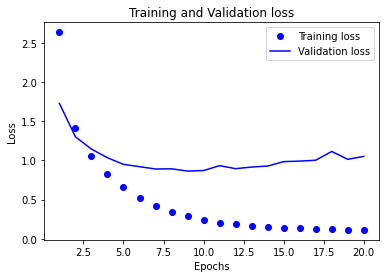

In [79]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label="Training loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.title("Training and Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

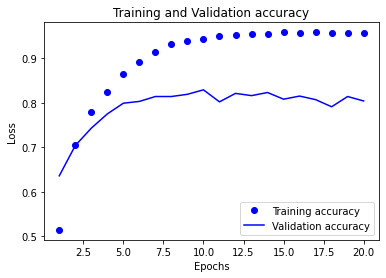

In [80]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label="Training accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation accuracy")
plt.title("Training and Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [81]:
history = model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

Epoch 1/9
16/16 [==============================] - 0s 12ms/step - loss: 0.1113 - accuracy: 0.9575 - val_loss: 1.0303 - val_accuracy: 0.8120
Epoch 2/9
16/16 [==============================] - 0s 10ms/step - loss: 0.1113 - accuracy: 0.9575 - val_loss: 1.0777 - val_accuracy: 0.8030
Epoch 3/9
16/16 [==============================] - 0s 10ms/step - loss: 0.1030 - accuracy: 0.9577 - val_loss: 1.1007 - val_accuracy: 0.8050
Epoch 4/9
16/16 [==============================] - 0s 11ms/step - loss: 0.0996 - accuracy: 0.9582 - val_loss: 1.1578 - val_accuracy: 0.8020
Epoch 5/9
16/16 [==============================] - 0s 11ms/step - loss: 0.1015 - accuracy: 0.9598 - val_loss: 1.1654 - val_accuracy: 0.7980
Epoch 6/9
16/16 [==============================] - 0s 11ms/step - loss: 0.1003 - accuracy: 0.9568 - val_loss: 1.1225 - val_accuracy: 0.8100
Epoch 7/9
16/16 [==============================] - 0s 11ms/step - loss: 0.1003 - accuracy: 0.9595 - val_loss: 1.1848 - val_accuracy: 0.7960
Epoch 8/9
16/16 [===